In [185]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [186]:
IMAGE_SIZE=256
CHANNELS=3

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 1506 images belonging to 3 classes.


In [187]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.60141224 0.5700397  0.6288632 ]
  [0.6020517  0.5706791  0.62950265]
  [0.6026912  0.5713186  0.63014215]
  ...
  [0.65317696 0.6100397  0.64141226]
  [0.66418344 0.6210461  0.65241873]
  [0.6698822  0.6267449  0.6581175 ]]

 [[0.58719033 0.5558178  0.6146413 ]
  [0.58846927 0.55709666 0.61592025]
  [0.5897482  0.55837566 0.6171992 ]
  ...
  [0.6541362  0.6109989  0.6423715 ]
  [0.6648229  0.6216856  0.6530582 ]
  [0.66956246 0.6264252  0.65779775]]

 [[0.59707123 0.5656987  0.6245222 ]
  [0.5957923  0.56441975 0.6232433 ]
  [0.5945134  0.56314087 0.6219644 ]
  ...
  [0.65509546 0.6119582  0.64333075]
  [0.6654623  0.62232506 0.6536976 ]
  [0.66924274 0.6261055  0.65747803]]

 ...

 [[0.41960788 0.35686275 0.40000004]
  [0.43754858 0.37480348 0.41794074]
  [0.470008   0.4072629  0.45040014]
  ...
  [0.42980748 0.3631408  0.39451334]
  [0.43108642 0.36441976 0.3957923 ]
  [0.4323654  0.36569872 0.39707127]]

 [[0.41960788 0.35686275 0.40000004]
  [0.43978676 0.37704164 0.42017892]


In [188]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 215 images belonging to 3 classes.


In [189]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 431 images belonging to 3 classes.


In [190]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes=3
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

In [191]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [192]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [193]:
history = model.fit(
    train_generator,
    steps_per_epoch=47, #1506/32
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6, #215/32
    epochs=25,
)

Epoch 1/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.4771 - loss: 0.9393 - val_accuracy: 0.5000 - val_loss: 0.8276
Epoch 2/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.4375 - loss: 0.8627 - val_accuracy: 0.4844 - val_loss: 0.8605
Epoch 3/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5605 - loss: 0.8581 - val_accuracy: 0.7344 - val_loss: 0.6877
Epoch 4/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.7500 - loss: 0.7009 - val_accuracy: 0.7448 - val_loss: 0.6753
Epoch 5/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7621 - loss: 0.5583 - val_accuracy: 0.8177 - val_loss: 0.4177
Epoch 6/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9062 - loss: 0.3724 - val_accuracy: 0.8438 - val_loss: 0.3963
Epoch 7/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8254 - loss: 0.3939 - val_accuracy: 0.8542 - val_loss: 0.3125
Epoch 8/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9688 - loss: 0.1236 - val_accuracy: 0.8490 - val_

In [194]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 675ms/step - accuracy: 0.9521 - loss: 0.1602


In [195]:
scores

[0.1146770715713501, 0.9605568647384644]

In [196]:
history

In [197]:
history.params

{'verbose': 'auto', 'epochs': 25, 'steps': 47}

In [198]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [199]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

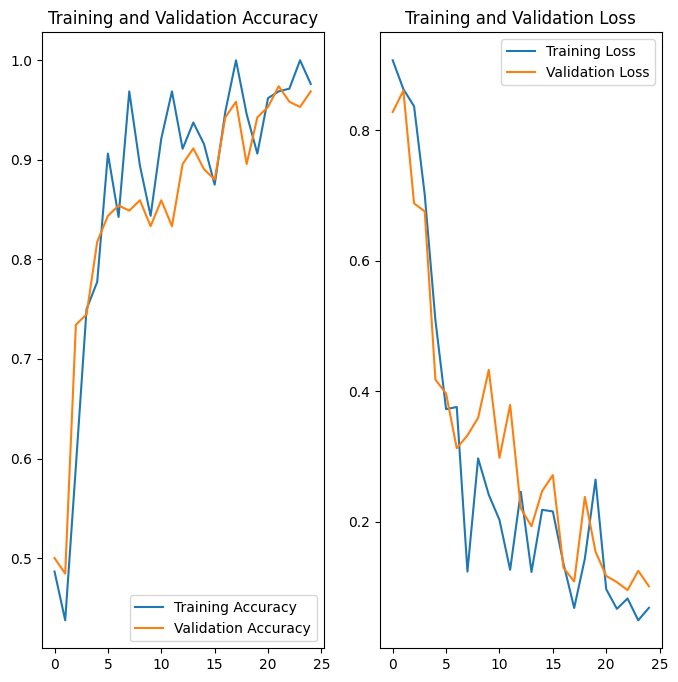

In [200]:
EPOCHS=25
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [201]:
np.argmax([9.9998784e-01,1.2109381e-05,2.0071200e-14])

0

In [202]:
class_names=['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

first image to predict
actual label: Tomato_Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
predicted label: Tomato_Early_blight


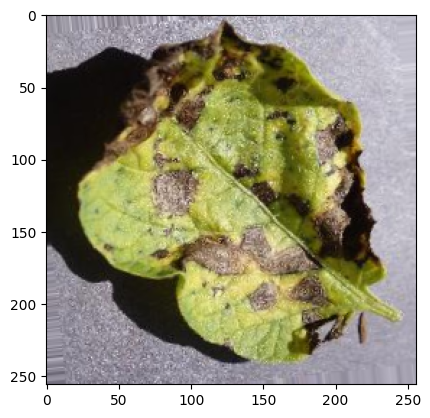

In [203]:
for images_batch, labels_batch in test_generator:
    first_image = images_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    break

In [204]:
def predict(model, images):
    img_array = tf.keras.preprocessing.image.img_to_array(images)
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


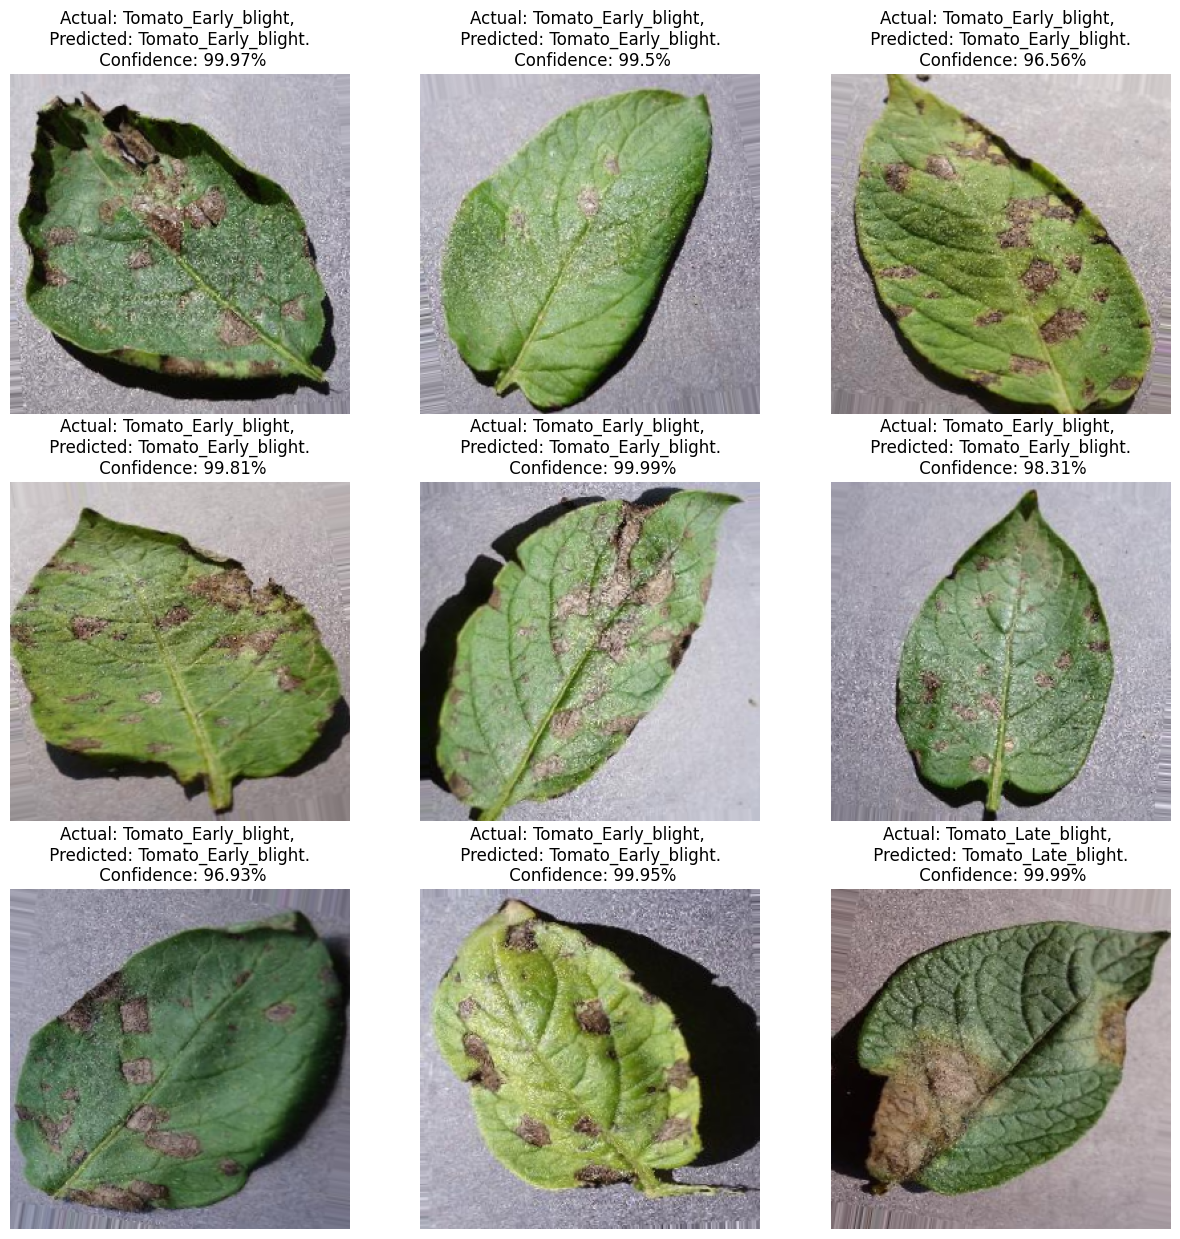

In [205]:
plt.figure(figsize=(15,15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model,images[i])
        actual_class = class_names[int(labels[i])]
        
        plt.title(f'Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%')
        plt.axis('off')
    break

In [206]:
model.save('../potatoes.h5')